In [3]:
from tkinter import * 
from tkinter import ttk
from tkinter import messagebox
from datetime import datetime
import pymysql as py
import os
import pandas as pd
print('All Module Laoded Successfully!!')

All Module Laoded Successfully!!


In [4]:
# Change your password 6 different Locations, where database is connected with Python
conn = py.connect(user = 'root',host = 'localhost',autocommit = True,password = '1234')
print('done1')
cur = conn.cursor()

try:
    q = f'''create database hms;'''
    cur.execute(q)
    print('done2')
    q = f'''use hms;'''
    cur.execute(q)
    print('done3')
    q = f'''create table hospital(
    NameOfTable varchar(50),
    RefrenceNo varchar(50) primary key,
    Dose varchar(50),
    NoOfTablets varchar(50),
    Lot varchar(50),
    IssueDate varchar(50),
    ExpDate varchar(50),
    DailyDose varchar(50),
    Storage varchar(50),
    NshNumber varchar(50),
    PatientName varchar(50),
    Dob varchar(50),
    Address varchar(50)
    );'''

    cur.execute(q)
    
    print('done4')
except Exception as e:
    print(e)
finally:
    conn.close()


done1
(1007, "Can't create database 'hms'; database exists")


In [5]:
class Hospital:
    def __init__(self,root):
        self.root = root
        self.root.title('HMS App')
        self.root.geometry('1500x800+0+0')

        # Color Scheme
        self.primary_color = '#2c3e50'  # Dark blue-gray
        self.secondary_color = '#3498db'  # Bright blue
        self.accent_color = '#e74c3c'  # Red
        self.light_color = '#ecf0f1'  # Light gray
        self.dark_color = '#2c3e50'  # Dark blue-gray
        self.success_color = '#27ae60'  # Green
        self.warning_color = '#f39c12'  # Orange
        
        # Font Styles
        self.boldFont = ('TkDefaultFont', 11, 'bold')
        self.headingFont = ('TkDefaultFont', 14, 'bold')
        self.titleFont = ('TkDefaultFont', 32, 'bold')

        self.TabletName = StringVar()
        self.RefrenceNo = StringVar()
        self.Dose = StringVar()
        self.NoOfTablets = StringVar()
        self.Lot = StringVar()
        self.IssueDate = StringVar()
        self.ExpDate = StringVar()
        self.DailyDose = StringVar()
        self.SideEffect = StringVar()
        self.FurtherInfo = StringVar()
        self.BloodPressure = StringVar()
        self.StorageAdvice = StringVar()
        self.Medication = StringVar()
        self.PatientId = StringVar()
        self.NHSNumber = StringVar()
        self.PatientName = StringVar()
        self.DateofBirth = StringVar()
        self.PatientAddress = StringVar()

        
# =================Frame Part===========================================================================================================================

        titleLabel = Label(self.root, text='Hospital Management System', 
                         bg=self.primary_color, fg='white', bd=10, 
                         relief=RIDGE, font=self.titleFont)
        titleLabel.pack(side=TOP, fill=X)
                       
        dateLabel = Label(self.root, text=datetime.now().date(), 
                         bg=self.secondary_color, fg='white', 
                         font=('TkDefaultFont', 8, 'bold'))
        dateLabel.place(x=100, y=40, anchor='center')
        
        dataFrame = Frame(self.root, bd=10, relief=RIDGE, bg=self.light_color)
        dataFrame.place(x=0, y=75, width=1365, height=400)

        leftFrame = LabelFrame(dataFrame, bd=10, relief=RIDGE, 
                             text='Patient Information', font=self.headingFont,
                             bg=self.light_color, fg=self.dark_color)
        leftFrame.place(x=0, width=950, height=375)

        rightFrame = LabelFrame(dataFrame, bd=10, relief=RIDGE, 
                              text='Prescription', font=self.headingFont,
                              bg=self.light_color, fg=self.dark_color)
        rightFrame.place(x=955, width=385, height=375)

        buttonFrame = Frame(self.root, bd=10, relief=RIDGE, bg=self.primary_color)
        buttonFrame.place(y=475, width=1365, height=70)

        detailFrame = Frame(self.root, bd=10, relief=RIDGE, bg=self.light_color)
        detailFrame.place(y=545, width=1365, height=155)

#=====================Left Part of leftFme=====================================================================================================

        tabletLabel = Label(leftFrame, text='Name of Tablet: ', 
                           font=self.boldFont, pady=8, padx=6,
                           bg=self.light_color, fg=self.dark_color)
        tabletLabel.grid(row=0, column=0)
        
        tabletName = ttk.Combobox(leftFrame, textvariable=self.TabletName, 
                                 state='readonly', width=30)
        tablets = ('alendronate tablet','alfuzosin hcl','altretamine',
                  'anastrazole','atenolol tablet')
        tabletName['values'] = tuple(map(lambda tablet: tablet.title(), tablets))
        tabletName.current(0)
        tabletName.grid(row=0, column=1)
# -----------------------------------------------------------------------------------------------------------------------------------------------
        refrenceLabel = Label(leftFrame, text="Refrence No: ", 
                            font=self.boldFont, pady=8, padx=6,
                            bg=self.light_color, fg=self.dark_color)
        refrenceLabel.grid(row=1, column=0, sticky=W)

        refrenceInput = Entry(leftFrame, textvariable=self.RefrenceNo, width=35,
                            bg='white', fg=self.dark_color, insertbackground=self.dark_color)
        refrenceInput.grid(row=1, column=1)
# -----------------------------------------------------------------------------------------------------------------------------------------------

        DoseLabel = Label(leftFrame, text="Dose: ", font=self.boldFont,
                        pady=8, padx=6, bg=self.light_color, fg=self.dark_color)
        DoseLabel.grid(row=2, column=0, sticky=W)

        DoseInput = Entry(leftFrame, textvariable=self.Dose, width=35,
                         bg='white', fg=self.dark_color, insertbackground=self.dark_color)
        DoseInput.grid(row=2, column=1)
# -----------------------------------------------------------------------------------------------------------------------------------------------
        NoOfTabletsLabel = Label(leftFrame, text="No Of Tablets: ", 
                               font=self.boldFont, pady=8, padx=6,
                               bg=self.light_color, fg=self.dark_color)
        NoOfTabletsLabel.grid(row=3, column=0, sticky=W)

        NoOfTabletsInput = Entry(leftFrame, width=35, textvariable=self.NoOfTablets,
                               bg='white', fg=self.dark_color, insertbackground=self.dark_color)
        NoOfTabletsInput.grid(row=3, column=1)
# -----------------------------------------------------------------------------------------------------------------------------------------------
        LotLabel = Label(leftFrame, text="Lot: ", font=self.boldFont,
                        pady=8, padx=6, bg=self.light_color, fg=self.dark_color)
        LotLabel.grid(row=4, column=0, sticky=W)

        LotInput = Entry(leftFrame, width=35, textvariable=self.Lot,
                        bg='white', fg=self.dark_color, insertbackground=self.dark_color)
        LotInput.grid(row=4, column=1)
# -----------------------------------------------------------------------------------------------------------------------------------------------

        IssueDateLabel = Label(leftFrame, text="Issue Date: ", 
                             font=self.boldFont, pady=8, padx=6,
                             bg=self.light_color, fg=self.dark_color)
        IssueDateLabel.grid(row=5, column=0, sticky=W)

        IssueDateInput = Entry(leftFrame, width=35, textvariable=self.IssueDate,
                             bg='white', fg=self.dark_color, insertbackground=self.dark_color)
        IssueDateInput.grid(row=5, column=1)
# -----------------------------------------------------------------------------------------------------------------------------------------------
        ExpDateLabel = Label(leftFrame, text="Exp Date: ", 
                           font=self.boldFont, pady=8, padx=6,
                           bg=self.light_color, fg=self.dark_color)
        ExpDateLabel.grid(row=6, column=0, sticky=W)

        ExpDateInput = Entry(leftFrame, width=35, textvariable=self.ExpDate,
                           bg='white', fg=self.dark_color, insertbackground=self.dark_color)
        ExpDateInput.grid(row=6, column=1)
# -----------------------------------------------------------------------------------------------------------------------------------------------
        DailyDoseLabel = Label(leftFrame, text="Daily Dose: ", 
                             font=self.boldFont, pady=8, padx=6,
                             bg=self.light_color, fg=self.dark_color)
        DailyDoseLabel.grid(row=7, column=0, sticky=W)

        DailyDoseInput = Entry(leftFrame, width=35, textvariable=self.DailyDose,
                              bg='white', fg=self.dark_color, insertbackground=self.dark_color)
        DailyDoseInput.grid(row=7, column=1)
# -----------------------------------------------------------------------------------------------------------------------------------------------

        SideEffectLabel = Label(leftFrame, text="Side Effect: ", 
                              font=self.boldFont, pady=8, padx=6,
                              bg=self.light_color, fg=self.dark_color)
        SideEffectLabel.grid(row=8, column=0, sticky=W)

        SideEffectInput = Entry(leftFrame, width=35, textvariable=self.SideEffect,
                               bg='white', fg=self.dark_color, insertbackground=self.dark_color)
        SideEffectInput.grid(row=8, column=1)

#=====================right Part of leftFme=====================================================================================================

        FurtherInfoLabel = Label(leftFrame, text="Further Info: ", 
                               font=self.boldFont, pady=8, padx=6,
                               bg=self.light_color, fg=self.dark_color)
        FurtherInfoLabel.grid(row=0, column=3, sticky=W)

        FurtherInfoInput = Entry(leftFrame, width=35, textvariable=self.FurtherInfo,
                               bg='white', fg=self.dark_color, insertbackground=self.dark_color)
        FurtherInfoInput.grid(row=0, column=4)
# -----------------------------------------------------------------------------------------------------------------------------------------------
        BloodPressureLabel = Label(leftFrame, text="Blood Pressure: ", 
                                 font=self.boldFont, pady=8, padx=6,
                                 bg=self.light_color, fg=self.dark_color)
        BloodPressureLabel.grid(row=1, column=3, sticky=W)

        BloodPressureInput = Entry(leftFrame, width=35, textvariable=self.BloodPressure,
                                 bg='white', fg=self.dark_color, insertbackground=self.dark_color)
        BloodPressureInput.grid(row=1, column=4)
# -----------------------------------------------------------------------------------------------------------------------------------------------

        StorageAdviceLabel = Label(leftFrame, text="Storage Advice: ", 
                                 font=self.boldFont, pady=8, padx=6,
                                 bg=self.light_color, fg=self.dark_color)
        StorageAdviceLabel.grid(row=2, column=3, sticky=W)

        StorageAdviceInput = Entry(leftFrame, width=35, textvariable=self.StorageAdvice,
                                 bg='white', fg=self.dark_color, insertbackground=self.dark_color)
        StorageAdviceInput.grid(row=2, column=4)
# -----------------------------------------------------------------------------------------------------------------------------------------------
        MedicationLabel = Label(leftFrame, text="Medication: ", 
                              font=self.boldFont, pady=8, padx=6,
                              bg=self.light_color, fg=self.dark_color)
        MedicationLabel.grid(row=3, column=3, sticky=W)

        MedicationInput = Entry(leftFrame, width=35, textvariable=self.Medication,
                              bg='white', fg=self.dark_color, insertbackground=self.dark_color)
        MedicationInput.grid(row=3, column=4)
# -----------------------------------------------------------------------------------------------------------------------------------------------
        PatientIdLabel = Label(leftFrame, text="Patient Id: ", 
                             font=self.boldFont, pady=8, padx=6,
                             bg=self.light_color, fg=self.dark_color)
        PatientIdLabel.grid(row=4, column=3, sticky=W)

        PatientIdInput = Entry(leftFrame, width=35, textvariable=self.PatientId,
                             bg='white', fg=self.dark_color, insertbackground=self.dark_color)
        PatientIdInput.grid(row=4, column=4)
# -----------------------------------------------------------------------------------------------------------------------------------------------

        NHSNumberLabel = Label(leftFrame, text="NHS Number: ", 
                             font=self.boldFont, pady=8, padx=6,
                             bg=self.light_color, fg=self.dark_color)
        NHSNumberLabel.grid(row=5, column=3, sticky=W)

        NHSNumberInput = Entry(leftFrame, width=35, textvariable=self.NHSNumber,
                             bg='white', fg=self.dark_color, insertbackground=self.dark_color)
        NHSNumberInput.grid(row=5, column=4)
# -----------------------------------------------------------------------------------------------------------------------------------------------
        PatientNameLabel = Label(leftFrame, text="Patient Name: ", 
                               font=self.boldFont, pady=8, padx=6,
                               bg=self.light_color, fg=self.dark_color)
        PatientNameLabel.grid(row=6, column=3, sticky=W)

        PatientNameInput = Entry(leftFrame, width=35, textvariable=self.PatientName,
                               bg='white', fg=self.dark_color, insertbackground=self.dark_color)
        PatientNameInput.grid(row=6, column=4)
# -----------------------------------------------------------------------------------------------------------------------------------------------
        DateofBirthLabel = Label(leftFrame, text="Date of Birth: ", 
                               font=self.boldFont, pady=8, padx=6,
                               bg=self.light_color, fg=self.dark_color)
        DateofBirthLabel.grid(row=7, column=3, sticky=W)

        DateofBirthInput = Entry(leftFrame, width=35, textvariable=self.DateofBirth,
                               bg='white', fg=self.dark_color, insertbackground=self.dark_color)
        DateofBirthInput.grid(row=7, column=4)
# -----------------------------------------------------------------------------------------------------------------------------------------------

        PatientAddressLabel = Label(leftFrame, text="Patient Address: ", 
                                  font=self.boldFont, pady=8, padx=6,
                                  bg=self.light_color, fg=self.dark_color)
        PatientAddressLabel.grid(row=8, column=3, sticky=W)

        PatientAddressInput = Entry(leftFrame, width=35, textvariable=self.PatientAddress,
                                  bg='white', fg=self.dark_color, insertbackground=self.dark_color)
        PatientAddressInput.grid(row=8, column=4)

#==================Right Frame=======================================================================================================================

        self.TextPrescription = Text(rightFrame, font=self.boldFont, bd=2, 
                                   relief=RIDGE, bg='white', fg=self.dark_color,
                                   insertbackground=self.dark_color)
        self.TextPrescription.place(x=10, y=10, width=350, height=325)

     
#==================Button Frame=======================================================================================================================
       
        ShowPrescriptionButton = Button(buttonFrame, command=self.ShowPrescription,
                                      text='Show Prescription', fg='white',
                                      bg=self.secondary_color, font=self.boldFont,
                                      width=17, height=1, activebackground=self.accent_color,
                                      activeforeground='white')
        ShowPrescriptionButton.place(x=10, y=10)
# -------------------------------------------------------------------------------------------------------------------------------------------------------------------
       
        AddPrescriptionButton = Button(buttonFrame, command=self.AddPrescription,
                                     text='Add Prescription', fg='white',
                                     bg=self.success_color, font=self.boldFont,
                                     width=17, height=1, activebackground=self.accent_color,
                                     activeforeground='white')
        AddPrescriptionButton.place(x=180, y=10)
# -------------------------------------------------------------------------------------------------------------------------------------------------------------------
       
        UpdateButton = Button(buttonFrame, command=self.Update,
                            text='Update', fg='white',
                            bg=self.secondary_color, font=self.boldFont,
                            width=17, height=1, activebackground=self.accent_color,
                            activeforeground='white')
        UpdateButton.place(x=350, y=10)
# -------------------------------------------------------------------------------------------------------------------------------------------------------------------
        DeleteButton = Button(buttonFrame, command=self.Delete,
                            text='Delete', fg='white',
                            bg=self.accent_color, font=self.boldFont,
                            width=17, height=1, activebackground=self.secondary_color,
                            activeforeground='white')
        DeleteButton.place(x=520, y=10)
# -------------------------------------------------------------------------------------------------------------------------------------------------------------------
        ClearButton = Button(buttonFrame, command=self.Clear,
                           text='Clear', fg='white',
                           bg=self.warning_color, font=self.boldFont,
                           width=17, height=1, activebackground=self.accent_color,
                           activeforeground='white')
        ClearButton.place(x=690, y=10)
# -------------------------------------------------------------------------------------------------------------------------------------------------------------------
        DownloadAllRecordsButton = Button(buttonFrame, command=self.DownloadAllRecords,
                                        text='Download All Records', fg='white',
                                        bg=self.secondary_color, font=self.boldFont,
                                        width=17, height=1, activebackground=self.accent_color,
                                        activeforeground='white')
        DownloadAllRecordsButton.place(x=860, y=10)
# -------------------------------------------------------------------------------------------------------------------------------------------------------------------
        PrintPrescriptionButton = Button(buttonFrame, command=self.PrintPrescription,
                                       text='Print Prescription', fg='white',
                                       bg=self.success_color, font=self.boldFont,
                                       width=17, height=1, activebackground=self.accent_color,
                                       activeforeground='white')
        PrintPrescriptionButton.place(x=1030, y=10)
# -------------------------------------------------------------------------------------------------------------------------------------------------------------------
        ExitButton = Button(buttonFrame, command=self.root.destroy,
                          text='Exit', fg='white',
                          bg=self.accent_color, font=self.boldFont,
                          width=14, height=1, activebackground=self.secondary_color,
                          activeforeground='white')
        ExitButton.place(x=1200, y=10)
# -------------------------------------------------------------------------------------------------------------------------------------------------------------------

# ==================detail Frame==============================================================================================================================================================
        
        
                
                # First ensure boldFont is defined (typically in your __init__ or setup method)
        self.boldFont = ('Arial', 10, 'bold')  # Or any font you prefer

        scrollX = ttk.Scrollbar(detailFrame, orient=HORIZONTAL)
        scrollY = ttk.Scrollbar(detailFrame, orient=VERTICAL)

        # Create and configure the style
        style = ttk.Style()

        # 1. PERMANENT HEADING STYLE (no hover effects)
        style.configure("Treeview.Heading",
        font=self.boldFont,
        background=self.primary_color,
        foreground='black',
        relief='flat',  # No 3D effect
        borderwidth=0,  # Remove any borders
        padding=5
        )

        # 2. COMPLETELY REMOVE HOVER EFFECTS
        style.map("Treeview.Heading",
        background=[('active', self.primary_color),  # Same color when active
                        ('pressed', self.primary_color),  # Same color when pressed
                        ('!active', self.primary_color)], # Default state
        foreground=[('active', 'Blue'),
                        ('pressed', 'Red'),
                        ('!active', 'Black')],
        relief=[('active', 'flat'),
                ('pressed', 'flat'),
                ('!active', 'flat')]
        )

        # 3. Configure Treeview rows (unchanged from your original)
        style.configure("Treeview",
        font=('TkDefaultFont', 10),
        background=self.light_color,
        fieldbackground=self.light_color,
        foreground=self.dark_color
        )
        style.map("Treeview", 
        background=[('selected', self.secondary_color)]
        )

        # Create Treeview (unchanged from your original)
        self.HospitalTable = ttk.Treeview(detailFrame,
        columns=('nameoftable', 'ref', 'dose', 'nooftablets',
                'lot', 'issuedate', 'expdate', 'dailydose',
                'storage', 'nhsnumber', 'pname', 'dob', 'address'),
        xscrollcommand=scrollX.set,
        yscrollcommand=scrollY.set
        )

        # Pack scrollbars (unchanged)
        scrollX.pack(side=BOTTOM, fill=X)
        scrollY.pack(side=RIGHT, fill=Y)
        scrollX.config(command=self.HospitalTable.xview)
        scrollY.config(command=self.HospitalTable.yview)

        # Set headings - these will now be permanently bold with no hover effects
        self.HospitalTable.heading('nameoftable', text='Name of Tablets')
        self.HospitalTable.heading('ref', text='Reference No')
        self.HospitalTable.heading('dose', text='Dose')
        self.HospitalTable.heading('nooftablets', text="No Of Tablets")
        self.HospitalTable.heading('lot', text='Lot')
        self.HospitalTable.heading('issuedate', text='Issue Date')
        self.HospitalTable.heading('expdate', text='Exp Date')
        self.HospitalTable.heading('dailydose', text='Daily Dose')
        self.HospitalTable.heading('storage', text='Storage')
        self.HospitalTable.heading('nhsnumber', text='NHS Number')
        self.HospitalTable.heading('pname', text='Patient Name')
        self.HospitalTable.heading('dob', text='DOB')
        self.HospitalTable.heading('address', text='Address')

        self.HospitalTable['show'] = 'headings'
        self.HospitalTable.pack(fill=BOTH, expand=1)

        # Set column widths (consider adjusting as previously suggested)
        self.HospitalTable.column('nameoftable', width=15)
        # ... (rest of your column width configurations)

        self.HospitalTable.bind('<ButtonRelease-1>', self.TableCursur)
        self.ShowTreeTable()
                
                
                
                
                                
      
        # ===================Show Prescription Function================================================================================================
    def ShowPrescription(self):
                self.TextPrescription.delete('1.0', END)
                self.TextPrescription.insert(END, 'Prescription'.ljust(56) + str(datetime.now().time())[:8] + '\n', 'heading')
                self.TextPrescription.insert(END, 'Tablet Name\t\t\t: ' + self.TabletName.get() + '\n')
                self.TextPrescription.insert(END, 'Refrence No\t\t\t: ' + self.RefrenceNo.get() + '\n')
                self.TextPrescription.insert(END, 'Dose\t\t\t: ' + self.Dose.get() + '\n')
                self.TextPrescription.insert(END, 'No Of Tablets\t\t\t: ' + self.NoOfTablets.get() + '\n')
                self.TextPrescription.insert(END, 'Lot\t\t\t: ' + self.Lot.get() + '\n')
                self.TextPrescription.insert(END, 'Issue Date\t\t\t: ' + self.IssueDate.get() + '\n')
                self.TextPrescription.insert(END, 'Exp Date\t\t\t: ' + self.ExpDate.get() + '\n')
                self.TextPrescription.insert(END, 'Daily Dose\t\t\t: ' + self.DailyDose.get() + '\n')
                self.TextPrescription.insert(END, 'Side Effect\t\t\t: ' + self.SideEffect.get() + '\n')
                self.TextPrescription.insert(END, 'Further information\t\t\t: ' + self.FurtherInfo.get() + '\n')
                self.TextPrescription.insert(END, 'Blood Pressure\t\t\t: ' + self.BloodPressure.get() + '\n')
                self.TextPrescription.insert(END, 'Storage Advice\t\t\t: ' + self.StorageAdvice.get() + '\n')
                self.TextPrescription.insert(END, 'Medication\t\t\t: ' + self.Medication.get() + '\n')
                self.TextPrescription.insert(END, 'PatientId\t\t\t: ' + self.PatientId.get() + '\n')
                self.TextPrescription.insert(END, 'NHS Number\t\t\t: ' + self.NHSNumber.get() + '\n')
                self.TextPrescription.insert(END, 'Patient Name\t\t\t: ' + self.PatientName.get() + '\n')
                self.TextPrescription.insert(END, 'Date of Birth\t\t\t: ' + self.DateofBirth.get() + '\n')
                self.TextPrescription.insert(END, 'PatientAddress\t\t\t: ' + self.PatientAddress.get() + '\n')
                
                # Configure text tags for styling
                self.TextPrescription.tag_configure('heading', foreground=self.primary_color, font=('TkDefaultFont', 12, 'bold'))
                        
# ==============Add Prescription===================================================================================================================================
    def AddPrescription(self):
        try:
            if self.TabletName.get() == '' or self.RefrenceNo.get() == '':
                messagebox.showerror('Error', 'All fields are required')
            else:
                conn = py.connect(user='root', host='localhost', autocommit=True, password='1234', database='hms')
                cur = conn.cursor()
                q = f'''insert into hms.hospital values('{self.TabletName.get()}',
                '{self.RefrenceNo.get()}',
                '{self.Dose.get()}',
                '{self.NoOfTablets.get()}',
                '{self.Lot.get()}',
                '{self.IssueDate.get()}',
                '{self.ExpDate.get()}',
                '{self.DailyDose.get()}',
                '{self.StorageAdvice.get()}',
                '{self.NHSNumber.get()}',
                '{self.PatientName.get()}',
                '{self.DateofBirth.get()}',
                '{self.PatientAddress.get()}'
                );'''
                cur.execute(q)
                conn.close()
                messagebox.showinfo('Success', 'Record has been inserted')
        except Exception as e:
            messagebox.showerror('Error', e)
            print(e)
        self.ShowTreeTable()

# ============Function Show Tree Table===============================================================================================================    
    def ShowTreeTable(self):
        conn = py.connect(user='root', host='localhost', password='1234', database='hms', autocommit=True)
        cur = conn.cursor()
        cur.execute('select * from hospital;')
        rows = cur.fetchall()
        if len(rows) != 0:
            self.HospitalTable.delete(*self.HospitalTable.get_children())    
            for row in rows:
                self.HospitalTable.insert('', END, values=row)  
        conn.close()

# ============Function Print Prescription===============================================================================================================    
    def PrintPrescription(self):
        data = ['Prescription\t\t\t' + str(str(datetime.now().time())[:8]) + '\n',
                'Tablet Name\t\t\t' + self.TabletName.get() + '\n',
                'Refrence No\t\t\t' + self.RefrenceNo.get() + '\n',
                'Dose\t\t\t' + self.Dose.get() + '\n',
                'No Of Tablets\t\t\t' + self.NoOfTablets.get() + '\n',
                'Lot\t\t\t' + self.Lot.get() + '\n',
                'Issue Date\t\t\t' + self.IssueDate.get() + '\n',
                'Exp Date\t\t\t' + self.ExpDate.get() + '\n',
                'Daily Dose\t\t\t' + self.DailyDose.get() + '\n',
                'Side Effect\t\t\t' + self.SideEffect.get() + '\n',
                'Further information\t\t\t' + self.FurtherInfo.get() + '\n',
                'Blood Pressure\t\t\t' + self.BloodPressure.get() + '\n',
                'Storage Advice\t\t\t' + self.StorageAdvice.get() + '\n',
                'Medication\t\t\t' + self.Medication.get() + '\n',
                'PatientId\t\t\t' + self.PatientId.get() + '\n',
                'NHS Number\t\t\t' + self.NHSNumber.get() + '\n',
                'Patient Name\t\t\t' + self.PatientName.get() + '\n',
                'Date of Birth\t\t\t' + self.DateofBirth.get() + '\n',
                'PatientAddress\t\t\t' + self.PatientAddress.get() + '\n']
        with open('data.txt', 'w+') as f:
            f.writelines(data)
        os.startfile('data.txt', 'print')
        self.ShowTreeTable()

# ============Function Download All Records===============================================================================================================    
    def DownloadAllRecords(self):
        try:
            conn = py.connect(user='root', host='localhost', password='1234', 
                            autocommit=True, database='hms')
            cur = conn.cursor()
            cur.execute('select * from hospital')
            rows = cur.fetchall()
            col = list(map(lambda x: x[0], cur.description))
            
            # Create a more reliable save path
            save_path = os.path.join(os.path.expanduser('~'), 'Downloads', 'patient_records.csv')
            
            # Ensure the Downloads directory exists
            os.makedirs(os.path.dirname(save_path), exist_ok=True)
            
            df = pd.DataFrame(rows, columns=col)
            temp_save_path = save_path.replace('.csv','.xlsx')
            df.to_excel(temp_save_path, index=False)
            os.startfile(temp_save_path, 'print')
            messagebox.showinfo('Success', 'Records downloaded successfully to:\n' + save_path)
            
        except Exception as e:
            messagebox.showerror('Error', f'Failed to download records:\n{str(e)}')
        finally:
            if 'conn' in locals():
                conn.close()

# ============Function Clear===============================================================================================================    
    def Clear(self):
        self.TabletName.set('')
        self.RefrenceNo.set('')
        self.Dose.set('')
        self.NoOfTablets.set('')
        self.Lot.set('')
        self.IssueDate.set('')
        self.ExpDate.set('')
        self.DailyDose.set('')
        self.SideEffect.set('')
        self.FurtherInfo.set('')
        self.BloodPressure.set('')
        self.StorageAdvice.set('')
        self.Medication.set('')
        self.PatientId.set('')
        self.NHSNumber.set('')
        self.PatientName.set('')
        self.DateofBirth.set('')
        self.PatientAddress.set('')

        self.TextPrescription.delete('1.0', END)
        self.ShowTreeTable()

# ============Function Table Curcur===============================================================================================================    
    def TableCursur(self, event=''):
        CursorRow = self.HospitalTable.focus()
        Data = self.HospitalTable.item(CursorRow)
        row = Data['values']

        self.TabletName.set(row[0])
        self.RefrenceNo.set(row[1])
        self.Dose.set(row[2])
        self.NoOfTablets.set(row[3])
        self.Lot.set(row[4])
        self.IssueDate.set(row[5])
        self.ExpDate.set(row[6])
        self.DailyDose.set(row[7])
        self.StorageAdvice.set(row[8])
        self.NHSNumber.set(row[9])
        self.PatientName.set(row[10])
        self.DateofBirth.set(row[11])
        self.PatientAddress.set(row[12])

# ============Function Update===============================================================================================================    
    def Update(self):
        conn = py.connect(user='root', host='localhost', database='hms', password='1234', autocommit=True)
        cur = conn.cursor()
        cur.execute(f'''update hospital
                        set 
                        NameOfTable = '{self.TabletName.get()}',
                        Dose = '{self.Dose.get()}',
                        NoOfTablets = '{self.NoOfTablets.get()}',
                        Lot = '{self.Lot.get()}',
                        IssueDate = '{self.IssueDate.get()}',
                        ExpDate = '{self.ExpDate.get()}',
                        DailyDose = '{self.DailyDose.get()}',
                        Storage = '{self.StorageAdvice.get()}',
                        NshNumber = '{self.NHSNumber.get()}',
                        PatientName = '{self.PatientName.get()}',
                        Dob = '{self.DateofBirth.get()}',
                        Address = '{self.PatientAddress.get()}'
                        where RefrenceNo = '{self.RefrenceNo.get()}';
                        ''')
        messagebox.showinfo('Updated', 'Patient record updated successfully!!')
        self.ShowTreeTable()
        conn.close()

    def Delete(self):
        conn = py.connect(user='root', host='localhost', database='hms', password='1234', autocommit=True)
        cur = conn.cursor()
        cur.execute(f'''delete from hospital where RefrenceNo = '{self.RefrenceNo.get()}';''')
        messagebox.showinfo('Deleted', 'Patient record deleted successfully!!')
        self.ShowTreeTable()
        self.Clear()
        conn.close()

In [28]:
# pip install openpyxl

In [6]:
root = Tk()
obj = Hospital(root)
root.mainloop()

![Screenshot 2025-04-29 172509.png](<attachment:Screenshot 2025-04-29 172509.png>)
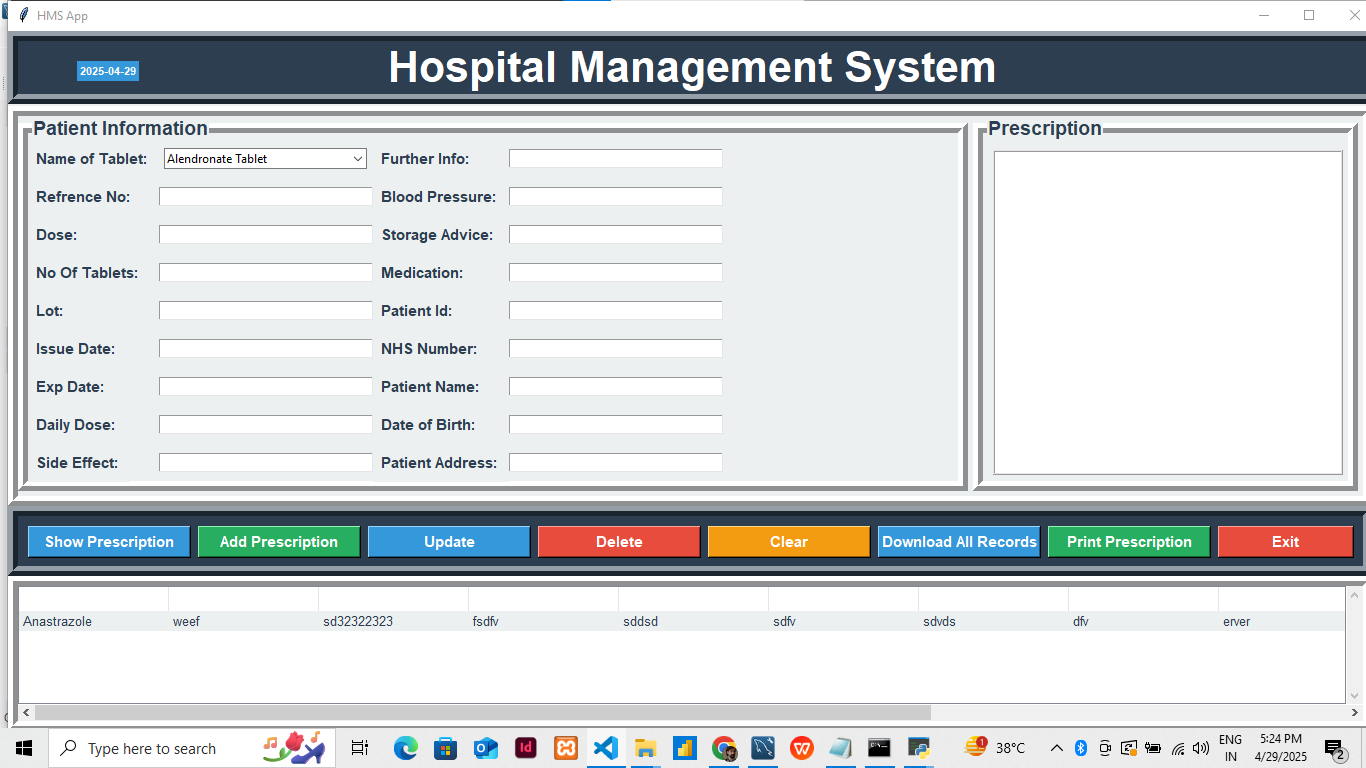